#The Sparks Foundation #GRIPMAY2023: task1

##Task 1 : Predicting percentage score of a student based on no. of hours of study

###BY POOJA T



This is a simple linear regression task as it involves just 2 variables.

The necessary steps are:

1.Import necessary libraries

2.Loading dataset

3.Understand the dataset

4.Visual representation of the dataset

5.Preparing the data for the model.

6.Splitting the datset for training and testing

7.Training the model

8.Testing the model

9.prediction of required score

10.Evaluating the model.


In [ ]:
#Importing libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [ ]:
#Loading dataset

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Checkking null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

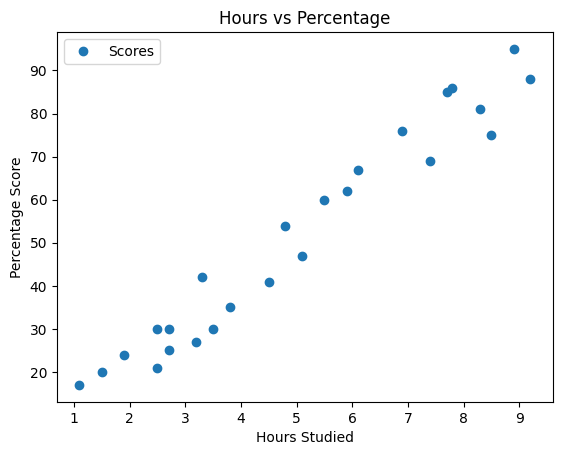

In [ ]:
#Scatter plot showing Hours vs Percentage

data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<Axes: xlabel='Hours'>

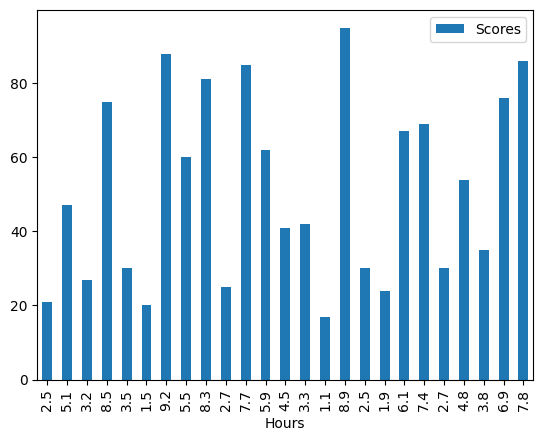

In [ ]:
#Barplot showing Hours vs Percentage

data.plot.bar(x='Hours',y='Scores')

From the above graphs we can see that there is a positive linear relationship between hours studied and  Percentage score.
Score of students increases with respect to hour studied.

In [ ]:
#Preparing the data for the model.
#Identifying the target variable and feature varible
#y is the target or dependent variable and x is the feature or independent variable.

y = data['Scores'].values
x = data.drop("Scores",axis=1).values


In [ ]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
#Splitting the datset for training and testing

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Training the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


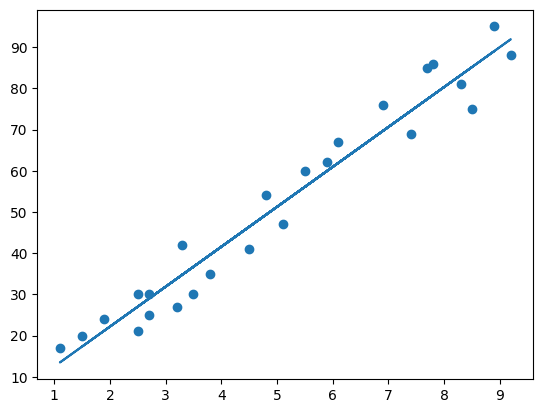

In [ ]:
# Plotting the regression line

line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [ ]:
#Testing the model

print(x_test) 
print("Predection of Score")
y_pred = regressor.predict(x_test)
print(y_pred)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
Predection of Score
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [ ]:
# Checking the accuracy of the model

data= pd.DataFrame({'actual_value': y_test, 'predicted_value': y_pred})  

data

,actual_value,predicted_value
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
# predicting the score of a student who studies for 9.25 hrs/ day.

hours = [[9.25]]
pred = regressor.predict(hours)
print(pred)


[92.38611528]


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


In [ ]:
print(y_test.shape)

(5,)


In [ ]:
print(y_train.shape)

(20,)


In [ ]:
#Evaluating the model

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

# calculate the R-squared score

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# print the R-squared score
print("R-squared: ", r2)    #The R-squared score ranges from 0 to 1, with a higher value indicating a better fit of the model to the data.

Mean Absolute Error: 3.9207511902099244
R-squared:  0.9678055545167994
